# Binning Issues
The binning script currently being used leads to a cross artifact along the central axes of the image. Consider the following random data. We're using a gaussian distribution so that we can tell at a glance if the binned data matches the distribution of the source data. With a uniform distribution there aren't any clear points for comparison.

## Source data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pybayesx.binning import bin

ImportError: attempted relative import with no known parent package

In [ ]:
size = 100
points = 10000
channels = 10

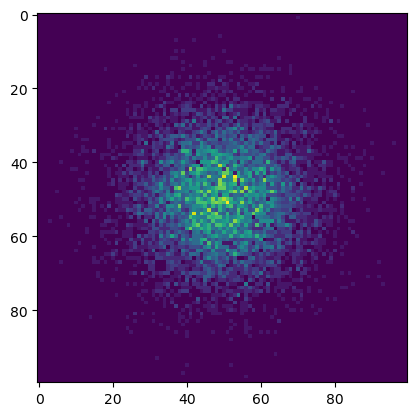

In [ ]:
rng = np.random.default_rng()
# x = rng.uniform(0, size, (points,))
# y = rng.uniform(0, size, (points,))

x = rng.normal(size/2, size/8, (points,))
y = rng.normal(size/2, size/8, (points,))
np.clip(x, 0, size-1, x)
np.clip(y, 0, size-1, y)

ch = rng.integers(0, channels, (points,), endpoint=True)

mat = np.zeros((size, size))
for i in range(0, points):
    mat[int(x[i]), int(y[i])] += 1

fig, ax = plt.subplots()
ax.imshow(mat)

## Binned with BayesX

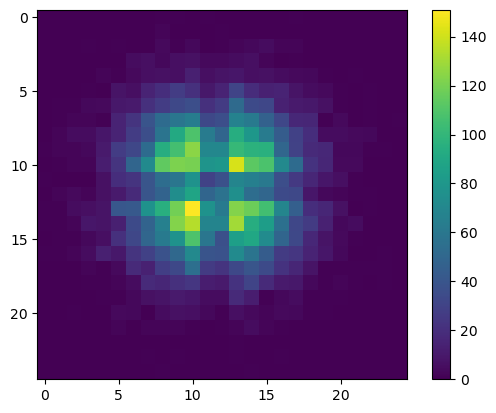

In [ ]:
cellsize = 4
nBins = int(size / cellsize)
binned = bin(x, y, ch, nBins, cellsize, x0=size/2, y0=size/2)
binned = np.reshape(binned, (nBins, nBins, channels))

fig1, ax1 = plt.subplots()
ax1 = ax1.imshow(np.sum(binned, axis=2))
fig1.colorbar(ax1)

## Binned With Numpy

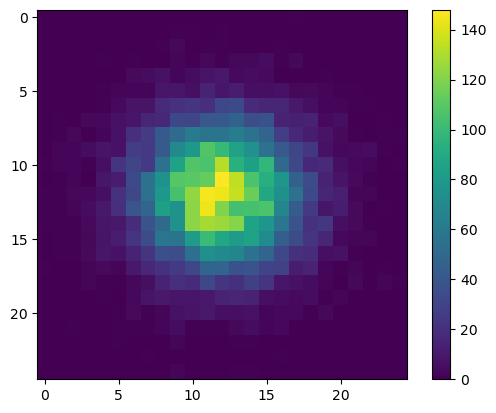

In [ ]:
npbin = np.histogramdd((x, y, ch), bins=(nBins, nBins, channels))[0]


fig2, ax2 = plt.subplots()
ax2 = ax2.imshow(np.sum(npbin, axis=2))
fig2.colorbar(ax2)

## Difference

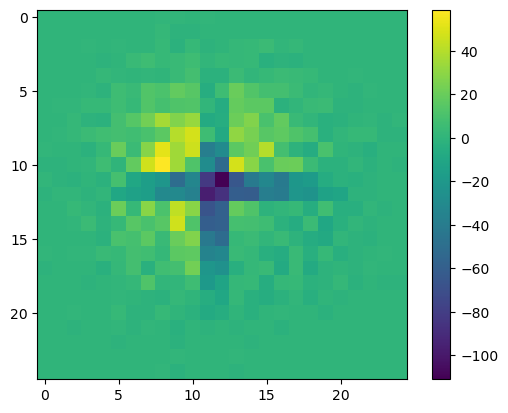

In [ ]:
diff = binned - npbin

fig3, ax3 = plt.subplots()
ax3 = ax3.imshow(np.sum(diff, axis=-1))
fig3.colorbar(ax3)